In [1]:
import numpy as np
import matplotlib.pyplot as plt

from buffers import Delay, FIRFilter

## Simulation of a delay buffer in a real-time fashion

In [2]:
fs = 1024
ts = 1/fs
nr_pts = 1024
time = np.linspace(0, (nr_pts - 1)*ts, nr_pts)

In [3]:
f = 5
signal = np.cos(2*np.pi*f*time)

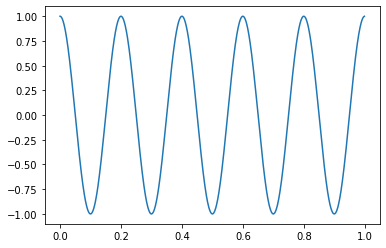

In [4]:
plt.plot(time, signal)

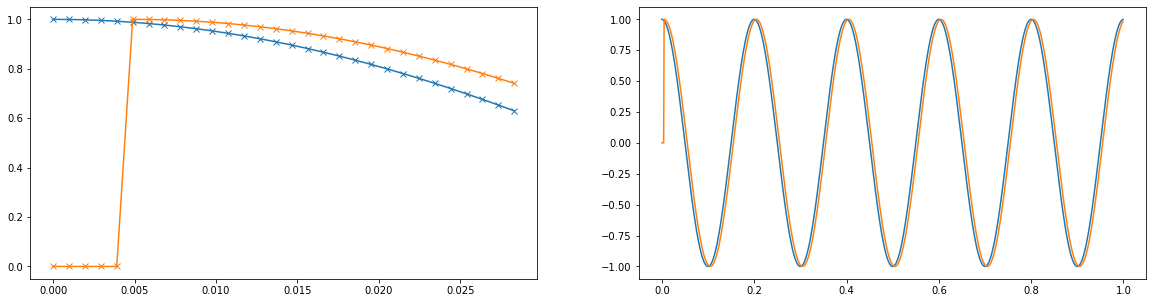

In [5]:
output = np.zeros(signal.shape)
buffer = Delay(delay=5)

for i in range(len(time)):
    buffer.insert(signal[i])
    output[i] = buffer.read()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
ax1.plot(time[:30], signal[:30], '-x')
ax1.plot(time[:30], output[:30], '-x')
ax2.plot(time, signal)
ax2.plot(time, output)

## Simulation of a FIR filter in a circular buffer

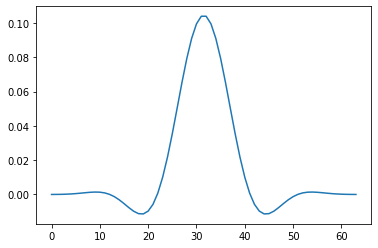

In [6]:
# filter properties
f_taps = np.genfromtxt("lp_64t.csv", delimiter=',')  # taps generated with pyfda
n = len(f_taps)
plt.plot(f_taps)

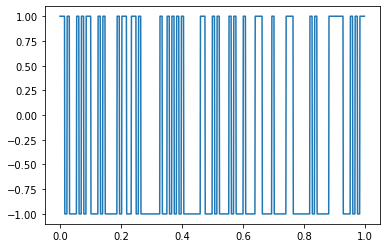

In [7]:
sig_size = 1024
sym_size = 8
rnd_bits = np.random.randint(0, 2, sig_size // sym_size)
signal = rnd_bits*2 - 1
signal = signal.repeat(sym_size)
plt.plot(time, signal)

In [8]:
output = np.zeros(sig_size)
filter_buf = FIRFilter(taps=f_taps)

for i in range(len(time)):
    filter_buf.insert(signal[i])
    output[i] = filter_buf.compute()  # one step of the convolution

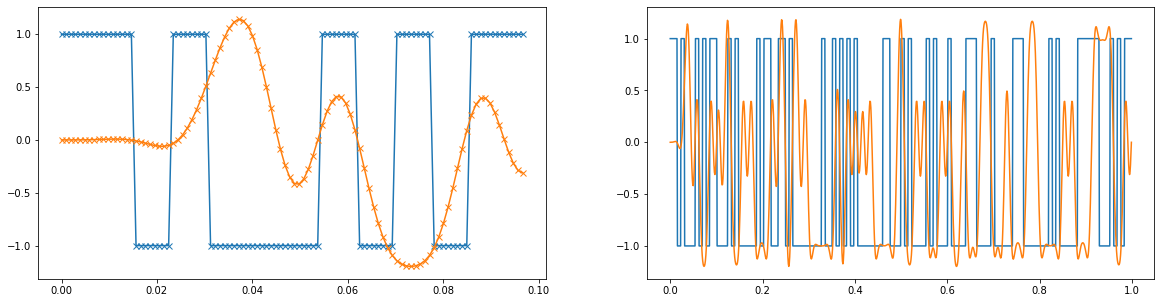

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
ax1.plot(time[:100], signal[:100], '-x')
ax1.plot(time[:100], output[:100], '-x')
ax2.plot(time, signal)
ax2.plot(time, output)

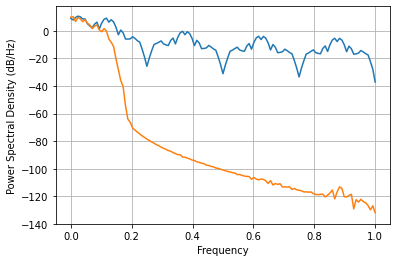

In [10]:
plt.psd(signal)
plt.psd(output);